In [25]:
import pandas as pd
#Data cleaning and preprocessing
import re
import nltk
nltk.download('all')
import nltk
from nltk.tokenize import word_tokenize
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
data = pd.read_csv('/content/drive/My Drive/NLP projects/Spam classifier/smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])

In [27]:
data.head() 

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
from nltk.corpus import stopwords

In [29]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def rem_pun_spe_char(text):
  return text.str.replace('[^a-zA-Z#]+',' ')

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)
def remove_retweet(text):
  z = re.compile('\#').sub('', re.compile('RT @').sub('', text, count=1).strip())
  return z
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def remove_space(text):
  return text.strip()
# Decontraction text

def rem_shortword(text):
  return  ' '.join([w for w in text.split() if len(w) > 3])
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute
  
def rembracket(text):
  val=re.sub(r"[\([{})\]]", "", text)
  return val
def convert_abbrev(word):
  return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
def convert_abbrev_in_text(text):
  tokens = word_tokenize(text)
  tokens = [convert_abbrev(word) for word in tokens]
  text = ' '.join(tokens)
  return text

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from collections import Counter

cnt = Counter()
def countdata(df):
  for text in df["message"].values:
    for word in text.split():
      cnt[word] += 1

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
  """custom function to remove the frequent words"""
  return " ".join([word for word in str(text).split() if word not in FREQWORDS])

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)


In [31]:
data['message'] = data['message'].apply(lambda x : remove_retweet(x))
data['message'] = data['message'].apply(lambda x : remove_username(x))
data['message']= data['message'].apply(lambda x : remove_url(x))
data['message']= data['message'].apply(lambda x : remove_space(x))
data['message'] = data['message'].apply(lambda x : remove_emoji(x))
data['message']= data['message'].apply(lambda x : remove_stopwords(x))
# data['message'] = data['message'].apply(lambda x : remove_emoticons(x))
data['message']= data['message'].apply(lambda x : seperate_alphanumeric(x))
data['message']= data['message'].apply(lambda x : rem_shortword(x))

print('done')

done


In [32]:
data['message'] = data['message'].apply(lambda x : unique_char(cont_rep_char,x))
data['message'] = data['message'].apply(lambda x : x.lower())
countdata(data)
data['message']= data['message'].apply(lambda x : remove_freqwords(x))
data['message']= data['message'].apply(lambda x : remove_rarewords(x))
data['message']= data['message'].apply(lambda x : lemmatize_words(x))

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv=CountVectorizer(max_features=2500)

In [48]:
X = cv.fit_transform(data['message']).toarray()
data.head()

,label,message
0,ham,jurong point crazy available bugis great world...
1,ham,joking
2,spam,free entry wkly comp final tkts 2005 text 8712...
3,ham,early already
4,ham,think go life around though


In [49]:
data['label']=data['label'].replace(['ham','spam'],[0,1])
data.head()

,label,message
0,0,jurong point crazy available bugis great world...
1,0,joking
2,1,free entry wkly comp final tkts 2005 text 8712...
3,0,early already
4,0,think go life around though


In [50]:
y=data['label']

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


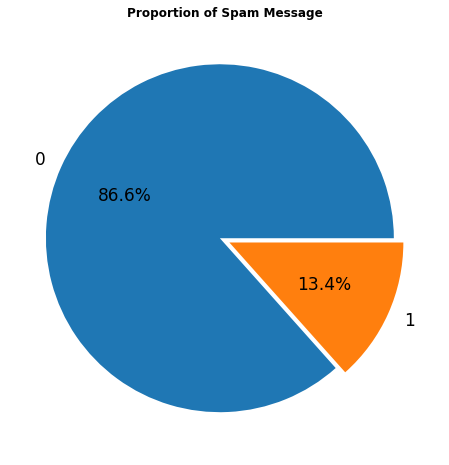

In [45]:
label=['0','1']
plt.figure(figsize=(8, 8))
plt.pie(data.groupby('label')['label'].count(),autopct="%.1f%%",labels=label , explode = [0.03, 0.03],textprops={'fontsize': 17})
plt.title('Proportion of Spam Message',fontweight='bold')

plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [52]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [53]:
y_pred=spam_detect_model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9730941704035875